In [5]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [225]:
#Fetch Images count from Folders

In [7]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir + ' Floder has ' + str(len(files)) + ' Images.')
    count = count + len(files)
print('Images Folder has ' + str(count) + 'Images')

daisy Floder has 764 Images.
dandelion Floder has 1052 Images.
rose Floder has 784 Images.
sunflower Floder has 733 Images.
tulip Floder has 984 Images.
Images Folder has 4317Images


In [228]:
#Load Images into Arrays as Dataset

In [9]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir, 
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size = batch,
                                                       image_size = (img_size, img_size)
                                                      )

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir, 
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size = batch,
                                                       image_size = (img_size, img_size)
                                                    )


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [13]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [15]:
import matplotlib.pyplot as plt

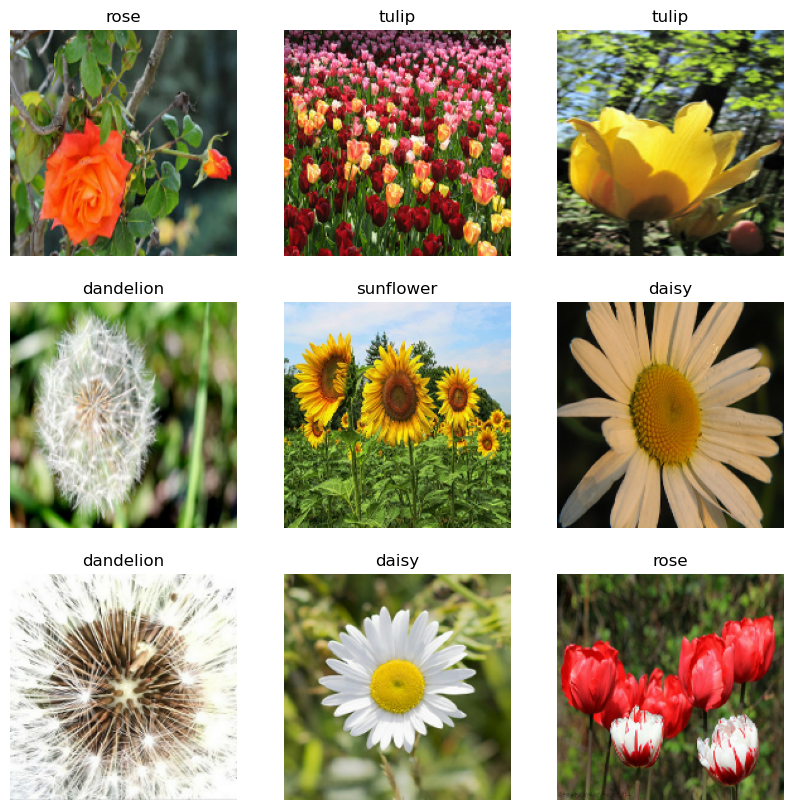

In [17]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [23]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [25]:
#Data Augmentation

In [31]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal', input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

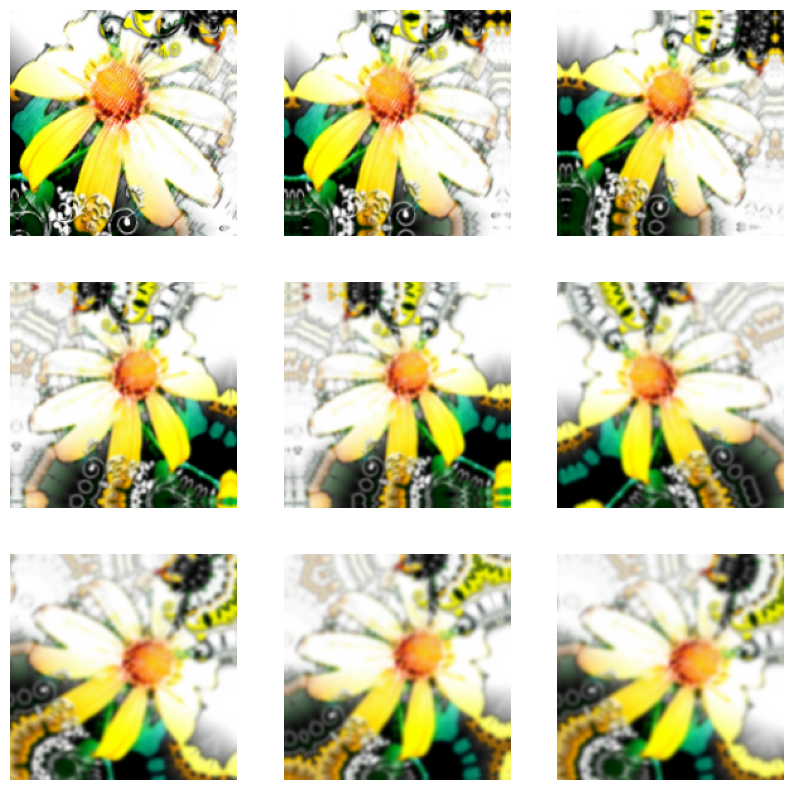

In [25]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [243]:
# Model Creatrion

In [267]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [269]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [271]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [273]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.3278 - loss: 1.4960 - val_accuracy: 0.5585 - val_loss: 1.0903
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 108s 995ms/step - accuracy: 0.5438 - loss: 1.1072 - val_accuracy: 0.6188 - val_loss: 0.9806
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 89s 820ms/step - accuracy: 0.6349 - loss: 0.9418 - val_accuracy: 0.6443 - val_loss: 0.9128
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 99s 914ms/step - accuracy: 0.6541 - loss: 0.8796 - val_accuracy: 0.6848 - val_loss: 0.8486
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 777ms/step - accuracy: 0.6629 - loss: 0.8561 - val_accuracy: 0.6929 - val_loss: 0.7990
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 80s 737ms/step - accuracy: 0.6987 - loss: 0.7792 - val_accuracy: 0.6848 - val_loss: 0.7799
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 76s 708ms/step - accuracy: 0.6994 - loss: 0.7701 - val_accuracy: 0.7034 - val_loss: 0.7714
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 74s 682ms/step - accuracy: 0.7345 - loss: 0.

In [295]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size = (180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)
    
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome

In [297]:
classify_images('Sample/sunflower.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


'The Image belongs to sunflower with a score of 99.60302710533142'